In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-04-02-01-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-03-02-01-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-03-01-02-01-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-07-02-01-02-01.wav
/kaggle/input/ravdess-emotional-speech-audio/audio_spee

/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-04-01-02-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-08-02-01-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-06-01-01-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-05-02-02-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-01-01-01-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-03-02-02-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-05-01-01-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-08-01-01-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-01-01-01-02-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-04-02-01-02-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-02-02-02-01-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_13/03-01-02-01-02-02-13.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_1

In [29]:
import librosa

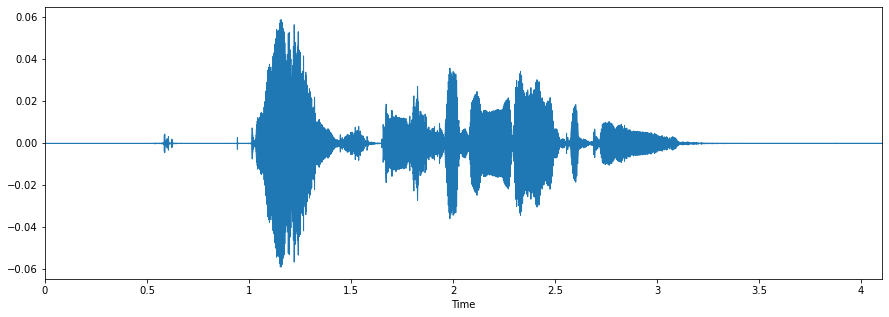

In [39]:
RAV = '/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'
fname = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-02-02-01-02.wav' 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)
          

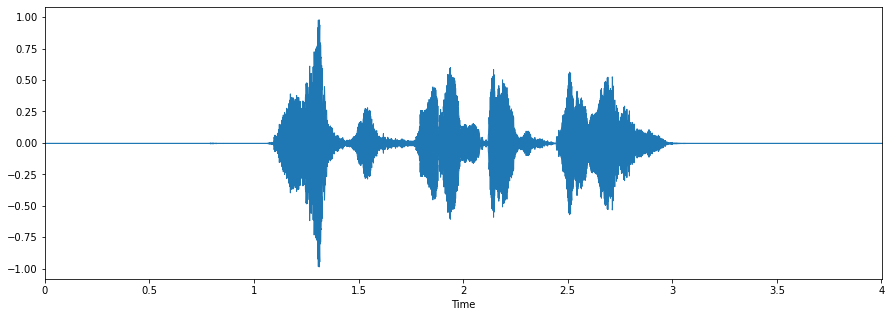

In [40]:
fname = '/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-02-02-01-02.wav' 
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [41]:
dir_list = os.listdir(RAV)
dir_list[0:5]

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21']

In [47]:
dir_list = os.listdir(RAV)
dir_list.sort()
#print(dir_list)
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        #print(f)
        part = f.split('.')[0].split('-')
        #print(part)
        
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)


#print(emotion)
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

[2, 1, 4, 2, 2, 6, 3, 3, 7, 5, 8, 2, 4, 4, 5, 5, 3, 5, 7, 3, 6, 8, 1, 4, 8, 3, 6, 8, 7, 7, 3, 3, 1, 2, 7, 4, 5, 8, 5, 8, 6, 2, 6, 6, 7, 4, 4, 8, 6, 4, 2, 8, 5, 2, 1, 7, 5, 7, 3, 6, 8, 1, 7, 7, 1, 6, 4, 1, 2, 3, 7, 5, 3, 6, 8, 6, 6, 2, 4, 3, 7, 8, 5, 3, 6, 5, 5, 5, 8, 2, 8, 3, 2, 5, 5, 3, 4, 7, 4, 2, 6, 2, 8, 7, 2, 6, 3, 6, 5, 1, 4, 4, 7, 8, 8, 2, 4, 4, 3, 7, 5, 8, 5, 3, 6, 5, 4, 4, 5, 8, 1, 3, 7, 4, 8, 2, 2, 5, 2, 6, 6, 6, 2, 7, 8, 3, 7, 4, 5, 4, 3, 8, 7, 3, 2, 7, 6, 3, 4, 4, 6, 8, 8, 1, 7, 4, 1, 8, 6, 2, 5, 7, 2, 7, 3, 5, 1, 2, 3, 6, 6, 2, 6, 5, 5, 6, 1, 6, 4, 6, 5, 4, 4, 8, 8, 2, 3, 7, 6, 8, 3, 1, 8, 2, 2, 3, 2, 8, 4, 7, 5, 4, 7, 2, 8, 3, 4, 4, 7, 6, 3, 7, 5, 8, 2, 7, 7, 8, 2, 4, 3, 5, 3, 3, 5, 7, 5, 6, 1, 1, 8, 8, 7, 6, 2, 8, 5, 7, 5, 5, 5, 6, 4, 3, 8, 3, 4, 4, 4, 6, 2, 1, 3, 5, 2, 7, 1, 2, 6, 6, 8, 3, 6, 6, 5, 8, 3, 1, 4, 4, 7, 7, 7, 5, 3, 5, 7, 2, 3, 4, 2, 1, 7, 8, 4, 2, 6, 3, 8, 2, 2, 2, 1, 6, 7, 8, 6, 7, 6, 4, 6, 8, 8, 1, 2, 4, 7, 1, 2, 2, 4, 6, 8, 7, 8, 7, 6, 5, 3, 4, 7, 6, 2, 

male_neutral       144
female_neutral     144
female_happy        96
female_fear         96
female_disgust      96
male_fear           96
male_surprise       96
male_sad            96
male_disgust        96
female_sad          96
female_angry        96
male_angry          96
female_surprise     96
male_happy          96
Name: labels, dtype: int64